# Problem 2: Separability & Feature Vectors 
**Under which of the following feature vectors is the data linearly separable?**

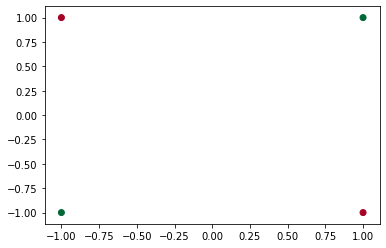

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

# Initializing data
data = pd.DataFrame.from_dict({'x1': [-1,-1,1,1], 'x2': [-1,1,-1,1], 'y': [1,-1,-1,1]})
plt.scatter(data.x1, data.x2, c = data.y>0, cmap = cm.RdYlGn)

### Feature Vector (a)

Plotting the first feature vector, it can be observed that under this feature vector the data is not linearly separable as no linear separator exists.

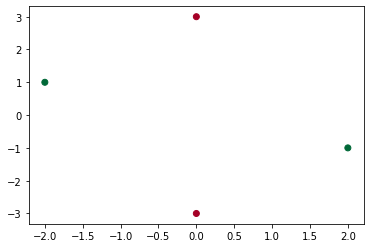

In [2]:
data['feature_a_x1'] = data.apply(lambda row: row['x1'] + (row['x2']), axis = 1)  
data['feature_a_x2'] = data.apply(lambda row: row['x1'] - (2 * row['x2']), axis = 1)  
plt.scatter(data.feature_a_x1, data.feature_a_x2, c = data.y>0, cmap = cm.RdYlGn)

### Feature Vector (b)

Plotting the second feature vector, it can be observed that under this feature vector the data is linearly separable and the plane z = 0 can be a linear separator.

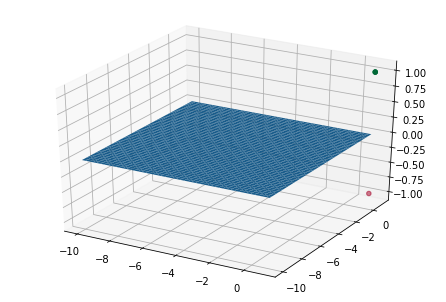

In [3]:
data['feature_b_x1'] = data['x1'].apply(lambda x: x ** 2)
data['feature_b_x2'] = data['x2'].apply(lambda x: x ** 2)
data['feature_b_x3'] = data.apply(lambda row: row['x1'] * (row['x2']), axis = 1)

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data.feature_b_x1, data.feature_b_x2, data.feature_b_x3, c = data.y>0, cmap = cm.RdYlGn)

x = np.arange(-10, 1, 0.025)
y = np.arange(-10, 1, 0.025)
X,Y = np.meshgrid(x,y)
Z = 0 * X + 0 * Y + 0
ax.plot_surface(X, Y, Z)

### Feature Vector (c)

Plotting the third feature vector, it can be observed that under this feature vector the data is not linearly separable as no linear separator exists.

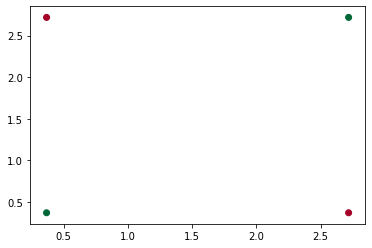

In [4]:
data['feature_c_x1'] = data['x1'].apply(math.exp)  
data['feature_c_x2'] = data['x2'].apply(math.exp)  
plt.scatter(data.feature_c_x1, data.feature_c_x2, c = data.y>0, cmap = cm.RdYlGn)

### Feature Vector (d)

Plotting the second feature vector, it can be observed that under this feature vector the data is linearly separable and the plane x = 0 can be a linear separator.

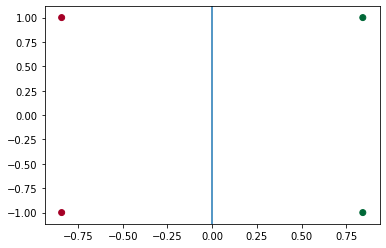

In [5]:
data['feature_d_x1'] = data.apply(lambda row: row['x1'] * math.sin(row['x2']), axis = 1)  
data['feature_d_x2'] = data['x2']
plt.scatter(data.feature_d_x1, data.feature_d_x2, c = data.y>0, cmap = cm.RdYlGn)
plt.axvline(x=0)

**2. Suppose that you wanted to perform polynomial regression for 2-dimensional data points
using gradient descent, i.e., you want to fit a polynomial of degree k to your data. Explain
how to do this using feature vectors. What is the per iteration complexity of gradient descent
as a function of the size of your feature representation and the number of training data points?**

Feature vectors can be used to increase/decrease the dimensions of the data points which then can be used to fit the polynomial
$$a_{k}*x^{k} + a_{k-1}*x^{k-1} + ... + a_{0}$$

Let $n$ be the number of input dimensions ($n = 1$ in this case), $m$ be the number of data points and $k$ be the degree of the polynomial

Per Iteration time complexity of gradient descent = Computing Loss + Computing (k+1) gradients

Computing Loss = $O(m(k+1))$

Computing kth gradient = $O(m(k+1))$

Computing k+1 gradients = $O(m(k+1)^{2})$

Per Iteration Complexity = $O(m(k+1) + m(k+1)^{2}) = O(m(k+1)^{2})$